In [3]:
import numpy as np
import pandas as pd
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set text displays for sklearn
from sklearn import set_config
set_config(display='text')
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)

import joblib
## Our standard imports
import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.2}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [5]:
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [7]:
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
rf = loaded_joblib['RandomForest']
lin_reg = loaded_joblib['LinearRegression']

## Explain Tree Based Model with SHAP

In [8]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [9]:
len(X_train)

4584

In [11]:
X_shap = shap.sample(X_train,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
1182,18.20,0.161490,37.6190,1997.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1219,14.00,0.029844,143.9786,2009.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7482,10.00,0.100056,113.3544,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7203,17.50,0.013693,259.7304,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
826,13.65,0.036107,184.4924,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

1182     366.1900
1219     866.8716
7482    3467.4864
7203    3616.6256
826     5182.5872
          ...    
5700    1128.5310
2660    2290.3520
8031     246.3460
4008    1640.5312
8127    6008.1792
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [14]:
explainer = shap.Explainer(rf)
explainer

In [15]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [16]:
X_shap.shape

(400, 27)

In [17]:
shap_values.shape

(400, 27)

In [18]:
shap_values[0]

.values =
array([-5.88708583e+01, -1.12773874e+01, -1.76963307e+03,  1.28267260e+01,
       -1.04800753e+00, -1.42836348e+00, -2.63712418e+00, -2.70001512e+00,
       -5.29533835e-01, -7.60775600e-02,  2.01768521e-02, -1.16977603e+00,
       -3.58512621e+01, -2.28411413e+00, -1.07922512e+01, -3.53913967e+00,
       -1.62950513e+00, -4.74123700e+00, -2.46693173e+00, -9.46656964e-01,
       -1.30629780e+00,  2.52528274e+00,  7.20747865e+00, -4.97176607e+00,
        7.60576077e+00,  7.80564286e+01, -1.41089577e+02])

.base_values =
array([2342.11099715])

.data =
array([1.82000000e+01, 1.61489509e-01, 3.76190000e+01, 1.99700000e+03,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       

In [20]:
pd.DataFrame(shap_values.values, columns = X_shap.columns)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
0,-58.870858,-11.277387,-1769.633070,12.826726,-1.048008,-1.428363,-2.637124,-2.700015,-0.529534,-0.076078,0.020177,-1.169776,-35.851262,-2.284114,-10.792251,-3.539140,-1.629505,-4.741237,-2.466932,-0.946657,-1.306298,2.525283,7.207479,-4.971766,7.605761,78.056429,-141.089577
1,-90.423837,-149.976341,-328.235271,-269.170926,1.021094,-0.271360,-3.267841,-2.640898,0.726817,-2.246067,-18.519767,-5.769685,-9.271938,-3.957619,-1.985398,-7.266368,-2.801640,-23.487385,-2.170057,-0.085032,-49.776896,-14.362840,-1.775758,-27.163206,-23.616128,122.086684,-254.583709
2,120.322007,145.908583,21.128481,16.862893,5.583363,1.681485,1.369685,-1.524939,-0.522784,1.137505,0.266116,1.193572,1.599489,3.351625,3.302353,-3.545989,-3.572378,161.861507,0.468383,-0.200616,-6.600293,7.832058,0.774922,-3.801400,6.547153,132.026696,-164.047498
3,-37.233013,139.683580,1931.817771,-341.776295,-8.139479,-0.952070,-1.354407,-1.591492,-1.780220,-2.814356,-17.253489,50.500781,-6.324972,0.992467,-8.766636,8.571557,2.971386,10.052936,-2.076950,3.784433,-35.560207,-5.682859,-9.782916,-7.206119,-48.940749,205.588078,-289.074998
4,183.288051,225.107821,1550.193517,-200.956681,-7.483947,9.575627,-0.261069,0.821992,-3.873296,10.844220,-1.722817,-0.629750,24.327353,-2.326060,2.580156,7.575107,-1.554633,198.695262,8.380589,-2.715057,-41.029630,3.943704,25.808824,-4.720825,97.810200,202.251410,-265.244146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,28.326795,12.802136,-1284.185048,37.626197,12.668703,19.280233,-4.489820,0.192031,-0.393585,-3.505212,0.127984,38.863559,-5.247854,-0.929631,-0.082790,-3.193211,-3.043686,-8.550190,0.280424,-0.342190,12.987341,28.890602,1.055218,-6.210118,20.824721,89.416011,-138.411224
396,4.219874,168.703020,-1755.092181,-3.203311,13.643143,23.751231,1.355758,-0.736547,-2.441635,-1.578503,2.195769,36.895160,-20.726531,-3.093209,0.339007,-8.129917,2.035409,4.996992,-0.454573,-0.573807,-3.460418,-1.232476,-4.158276,-2.763064,-12.870251,95.404456,1000.762039
397,20.836998,24.788259,-132.814390,-326.836592,-2.576617,0.025690,0.046985,-2.216714,-0.461957,-0.588382,-0.278522,-3.299791,-3.091394,-2.060922,-5.405043,0.348770,0.032566,-6.661511,0.554811,-0.084427,5.075055,4.567017,-1.067172,-4.459006,8.038214,-1479.338728,-152.312406
398,-71.034745,-193.133133,-164.924902,-27.050282,-0.010877,-0.470378,-2.806910,-1.312799,0.706869,-7.294498,1.325594,8.565131,2.354398,-1.263073,-6.238595,-11.355968,-0.923853,-41.855011,-1.165173,0.010932,12.047539,12.762719,-3.637941,-27.464729,11.935601,141.591253,-203.396316


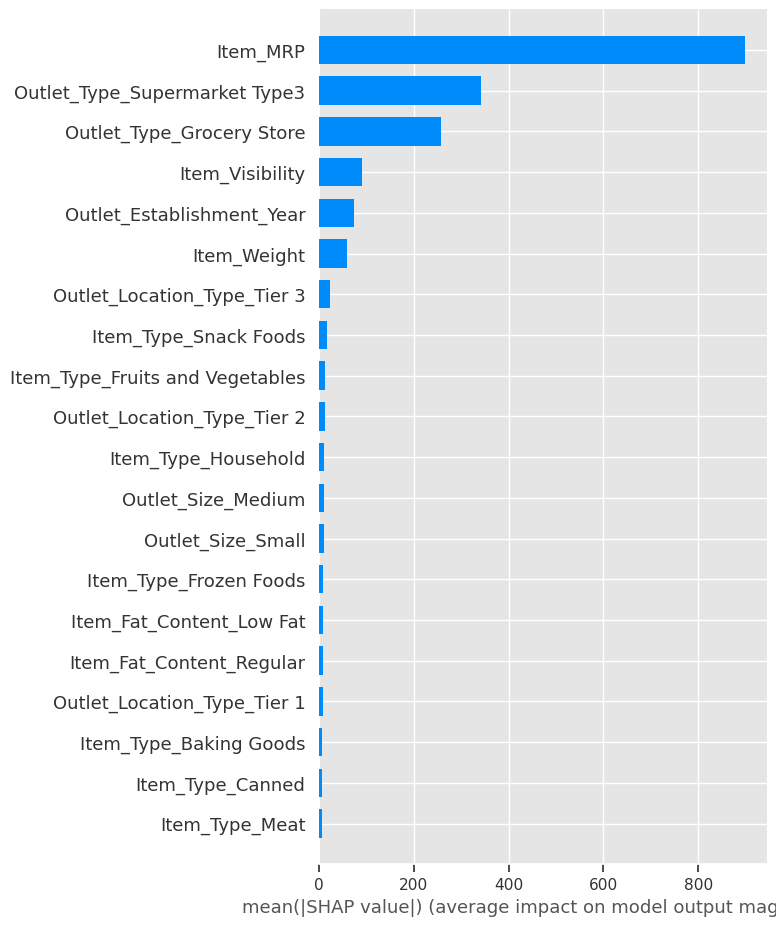

In [30]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')
fig.savefig('shap_importances.png')

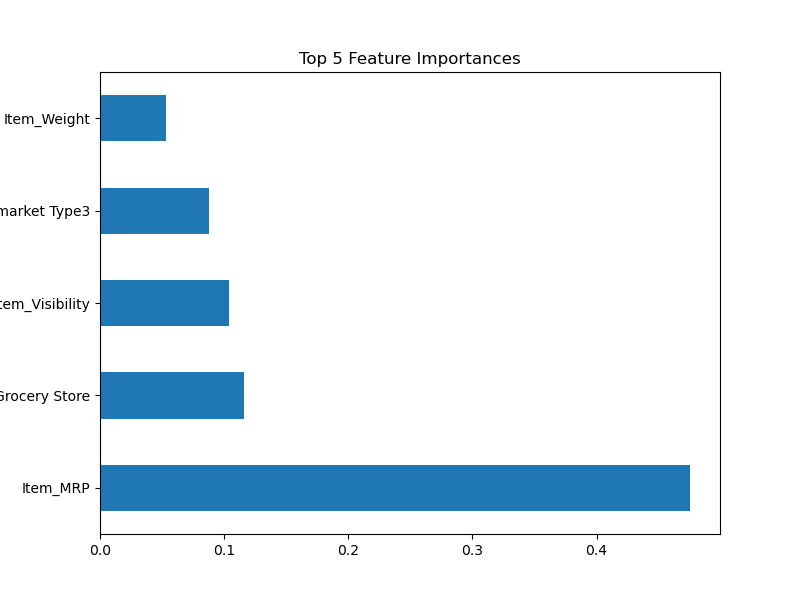

- The most important features according to SHAP and the feature importances graph are very similar, but there are some differences. Item visibility was labeled as less important by SHAP, and Item_Weight was not in SHAP's top 5 importances. 

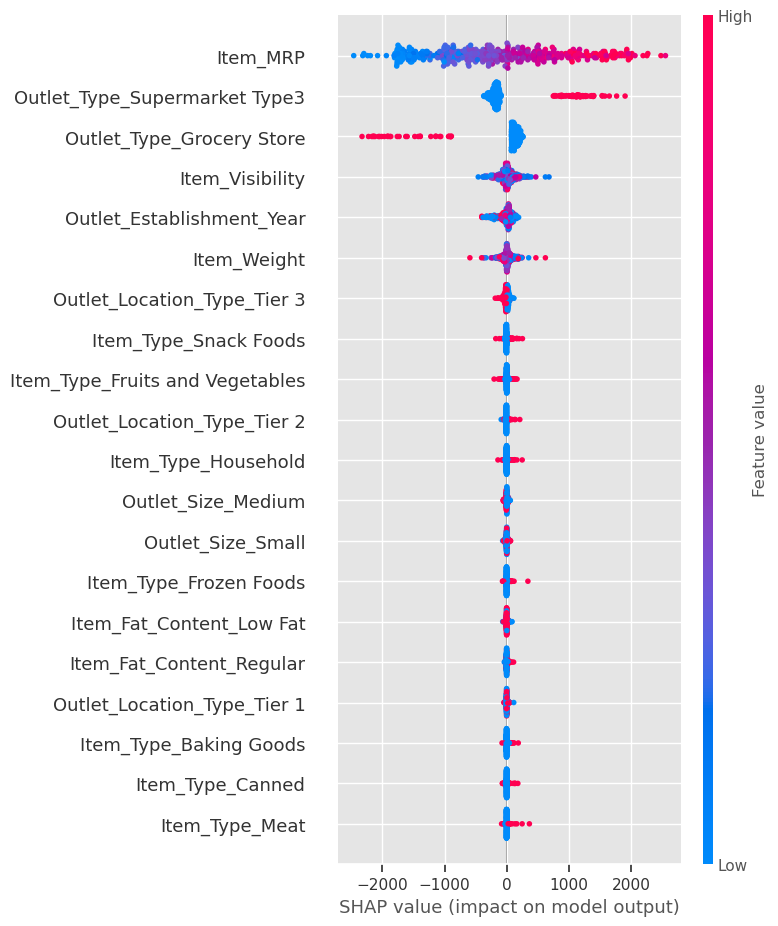

In [31]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap, plot_type='dot')
fig.savefig('dot_importances.png')

- For the feature Item_MRP, there were a wide range of high and low values that had an impact on the model. Rows that were Supermarket Type 3 had a higher impact on the model than rows that were not. This is contrary to grocery stores, where those that were not grocery stores had a higher impact on the model than those that were not.